In [1]:
import pyfolio as pf
%matplotlib inline
import pandas as pd

# silence warnings
import warnings
warnings.filterwarnings('ignore')

import sharadar
%load_ext sharadar

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
%%zipline --start 2011-01-01 --end 2020-01-01 -o results.pickle

from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt
import pandas as pd
from sharadar.util.run_algo import run_algorithm
from sharadar.util import performance
from sharadar.util.performance import change_extension
from logbook import Logger, FileHandler, DEBUG, INFO, StreamHandler
import sys
import os
from zipline.algorithm import log



# silence warnings
import warnings
warnings.filterwarnings('ignore')

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')
    log.info("*  *  *  I N I T  *  *  *")


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


[2020-05-18 22:37:30.626236] INFO: sharadar_db_bundle: Using bundle 'sharadar'.
[2020-05-18 22:37:30.684360] WARNING: Loader: Refusing to download new benchmark data because a download succeeded at 2020-05-18 22:25:05.881878+00:00.
[2020-05-18 22:37:30.721567] WARNING: Loader: Refusing to download new treasury data because a download succeeded at 2020-05-18 22:25:08.703883+00:00.
[2020-05-18 22:37:31.494035] INFO: ZiplineLog: *  *  *  I N I T  *  *  *
[2020-05-18 22:37:31.910391] INFO: sharadar_db_bundle: Loading raw arrays for 1 assets (<class 'list'>).
[2020-05-18 22:37:31.928066] INFO: sharadar_db_bundle: Loading raw arrays for 1 assets (<class 'list'>).
[2020-05-18 22:37:32.229236] INFO: sharadar_db_bundle: Loading raw arrays for 1 assets (<class 'list'>).
[2020-05-18 22:37:32.247509] INFO: sharadar_db_bundle: Loading raw arrays for 1 assets (<class 'list'>).
[2020-05-18 22:37:32.531243] INFO: sharadar_db_bundle: Loading raw arrays for 1 assets (<class 'list'>).
[2020-05-18 22:37:3

[2020-05-18 22:37:43.201172] INFO: sharadar_db_bundle: Loading raw arrays for 1 assets (<class 'list'>).
[2020-05-18 22:37:43.218419] INFO: sharadar_db_bundle: Loading raw arrays for 1 assets (<class 'list'>).
[2020-05-18 22:37:43.527351] INFO: sharadar_db_bundle: Loading raw arrays for 1 assets (<class 'list'>).
[2020-05-18 22:37:43.543657] INFO: sharadar_db_bundle: Loading raw arrays for 1 assets (<class 'list'>).
[2020-05-18 22:37:43.824797] INFO: sharadar_db_bundle: Loading raw arrays for 1 assets (<class 'list'>).
[2020-05-18 22:37:43.841617] INFO: sharadar_db_bundle: Loading raw arrays for 1 assets (<class 'list'>).
[2020-05-18 22:37:44.119587] INFO: sharadar_db_bundle: Loading raw arrays for 1 assets (<class 'list'>).
[2020-05-18 22:37:44.136291] INFO: sharadar_db_bundle: Loading raw arrays for 1 assets (<class 'list'>).
[2020-05-18 22:37:44.413373] INFO: sharadar_db_bundle: Loading raw arrays for 1 assets (<class 'list'>).
[2020-05-18 22:37:44.430023] INFO: sharadar_db_bundle: 

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2011-01-03 21:00:00+00:00,NaN,NaN,0.000000,NaN,0.010338,NaN,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2011-01-04 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.009781,0.122228,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,2,[],0.0
2011-01-05 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.015030,0.086473,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,3,[],0.0
2011-01-06 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.013042,0.089617,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,4,[],0.0
2011-01-07 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.011054,0.086001,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,5,[],0.0
2011-01-10 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.009781,0.080144,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,6,[],0.0
2011-01-11 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.013360,0.074053,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,7,[],0.0
2011-01-12 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.022505,0.079349,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,8,[],0.0
2011-01-13 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.020835,0.077837,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,9,[],0.0
2011-01-14 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,0.028231,0.077463,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,10,[],0.0


In [3]:
results = pd.read_pickle('results.pickle')
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

Start date,2011-01-03
End date,2019-12-31
Total months,107
,Backtest
Annual return,-0.0%
Cumulative returns,-0.4%
Annual volatility,0.2%
Sharpe ratio,-0.25
Calmar ratio,-0.07
Stability,0.65
Max drawdown,-0.7%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.73,2012-09-19,2015-08-24,NaT,NaN
1,0.11,2012-04-09,2012-05-17,2012-08-16,94
2,0.02,2012-09-07,2012-09-11,2012-09-13,5
3,0.02,2012-03-28,2012-03-30,2012-04-02,4
4,0.01,2012-08-27,2012-08-30,2012-09-06,9


Stress Events,mean,min,max
US downgrade/European Debt Crisis,0.00%,0.00%,0.00%
Fukushima,0.00%,0.00%,0.00%
EZB IR Event,-0.00%,-0.02%,0.02%
Apr14,0.00%,-0.01%,0.04%
Oct14,0.00%,0.00%,0.00%
Fall2015,-0.00%,-0.01%,0.01%
Recovery,-0.00%,-0.04%,0.05%
New Normal,-0.00%,-0.55%,0.04%


Top 10 long positions of all time,max
sid,
AAPL,0.70%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
AAPL,0.70%


Summary stats,All trades,Long trades
Total number of round_trips,5.00,5.00
Percent profitable,0.60,0.60
Winning round_trips,3.00,3.00
Losing round_trips,2.00,2.00
Even round_trips,0.00,0.00


PnL stats,All trades,Long trades
Total profit,$-43778.58,$-43778.58
Gross profit,$14555.00,$14555.00
Gross loss,$-58333.58,$-58333.58
Profit factor,$0.25,$0.25
Avg. trade net profit,$-8755.72,$-8755.72
Avg. winning trade,$4851.67,$4851.67
Avg. losing trade,$-29166.79,$-29166.79
Ratio Avg. Win:Avg. Loss,$0.17,$0.17
Largest winning trade,$8833.74,$8833.74
Largest losing trade,$-47471.17,$-47471.17


Duration stats,All trades,Long trades
Avg duration,330 days 20:24:00.200000,330 days 20:24:00.200000
Median duration,207 days 23:00:00,207 days 23:00:00
Longest duration,837 days 01:00:00,837 days 01:00:00
Shortest duration,98 days 01:00:00,98 days 01:00:00


Return stats,All trades,Long trades
Avg returns all round_trips,0.09%,0.09%
Avg returns winning,0.09%,0.09%
Avg returns losing,nan%,nan%
Median returns all round_trips,0.09%,0.09%
Median returns winning,0.09%,0.09%
Median returns losing,nan%,nan%
Largest winning trade,0.09%,0.09%
Largest losing trade,0.09%,0.09%


Symbol stats,AAPL
Avg returns all round_trips,0.09%
Avg returns winning,0.09%
Avg returns losing,nan%
Median returns all round_trips,0.09%
Median returns winning,0.09%
Median returns losing,nan%
Largest winning trade,0.09%
Largest losing trade,0.09%


Profitability (PnL / PnL total) per name,
symbol,
AAPL,100.00%


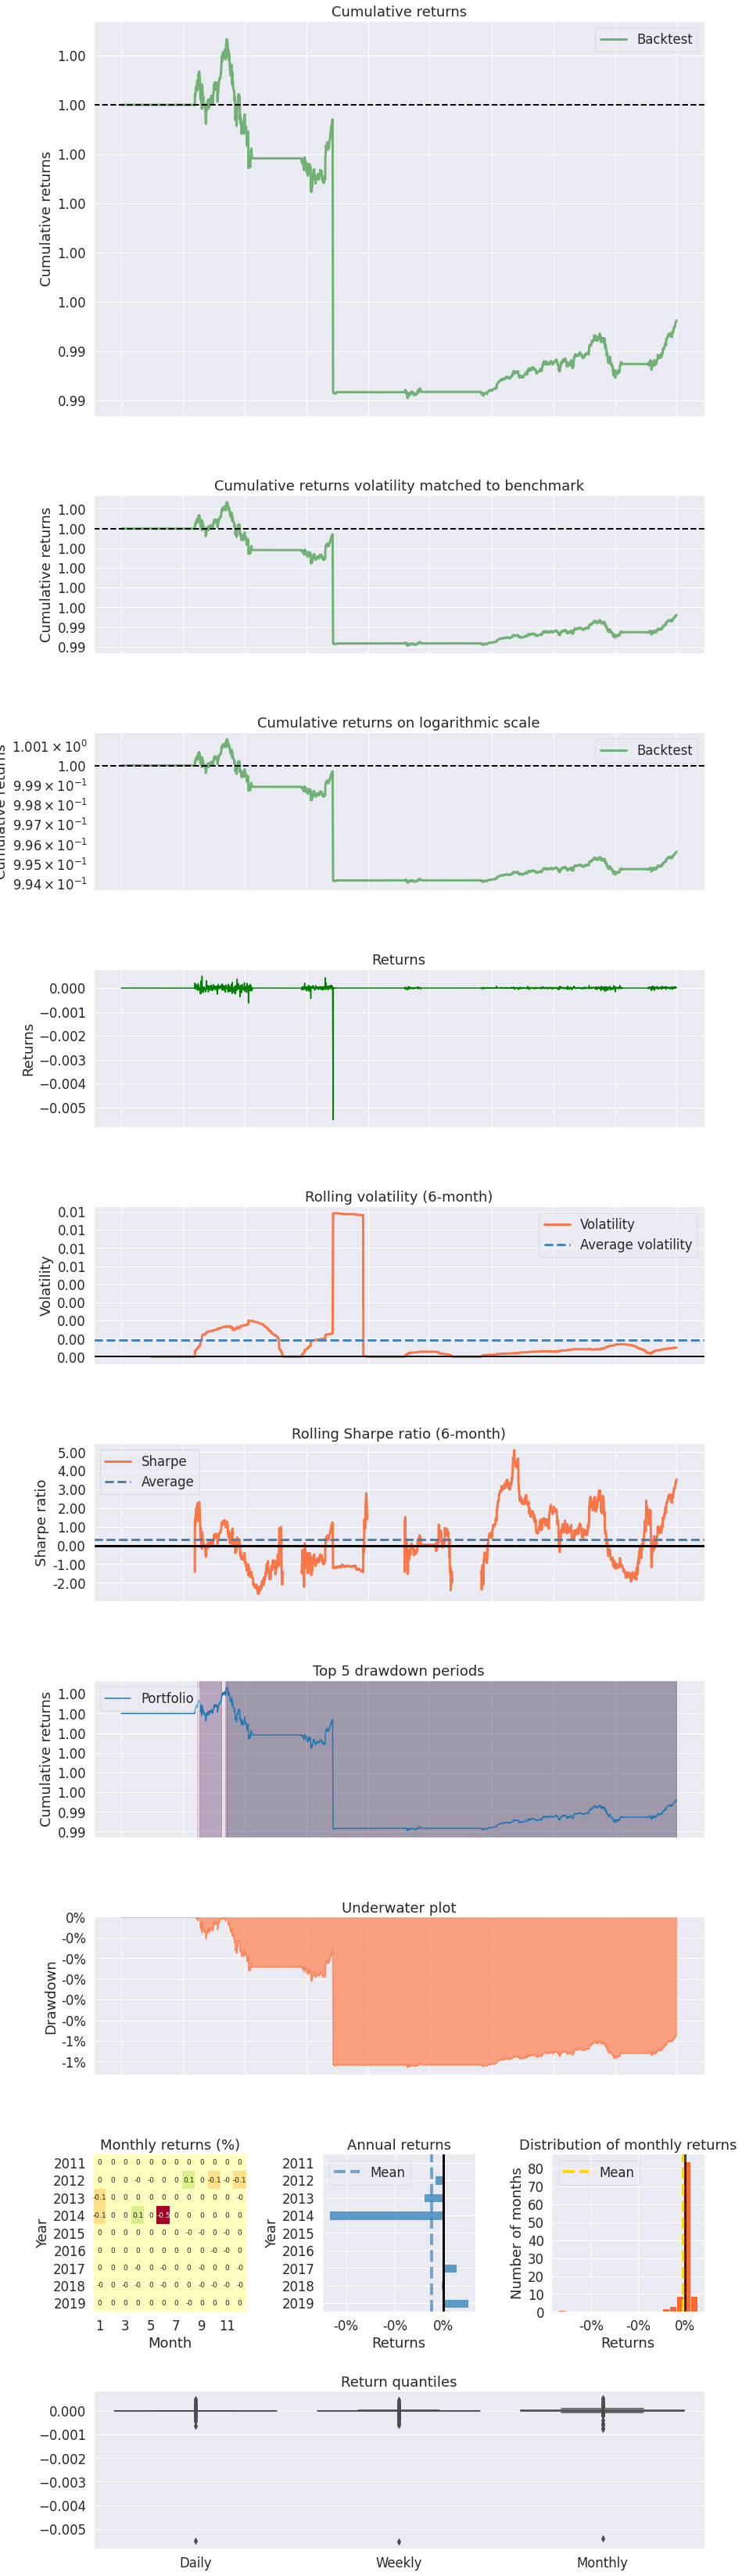

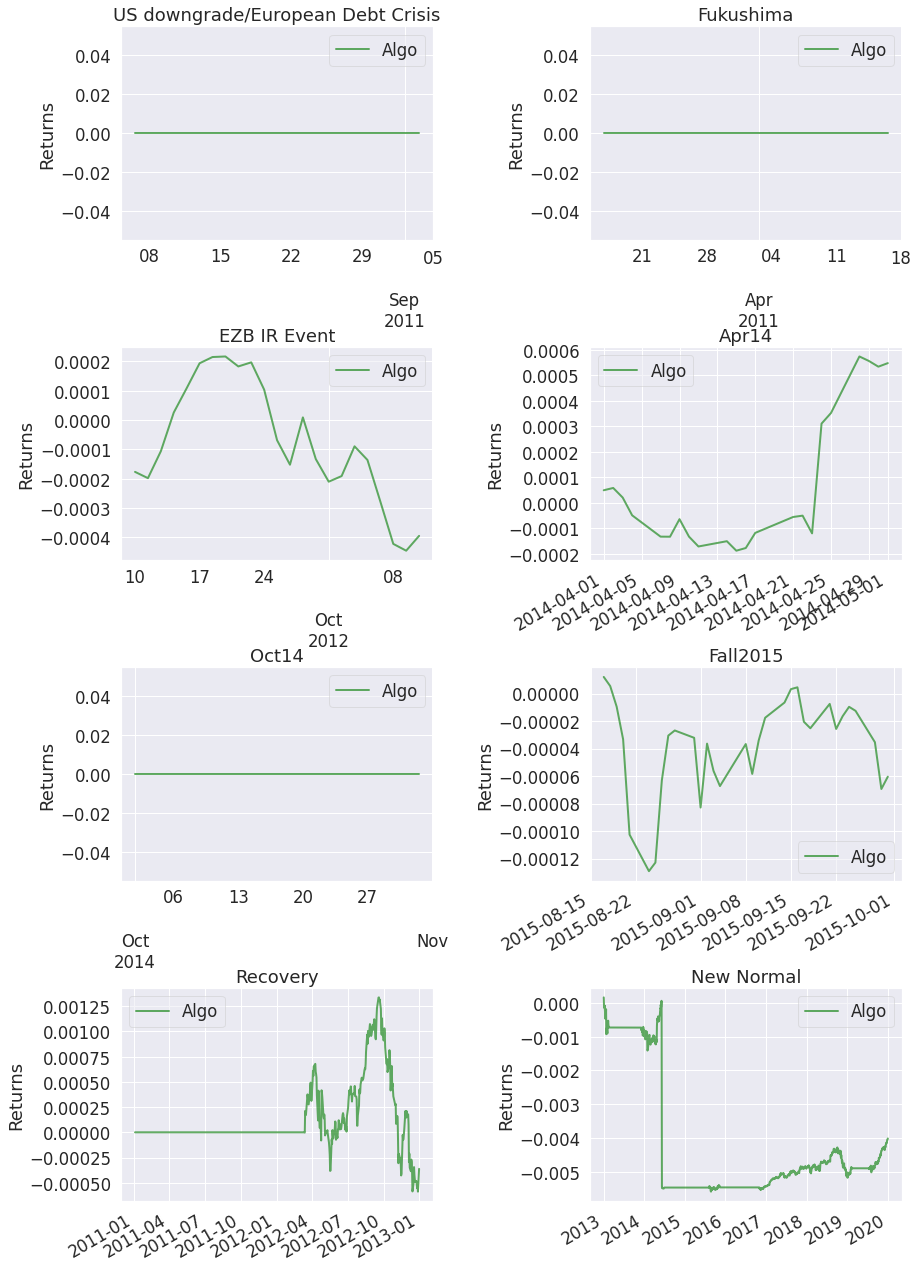

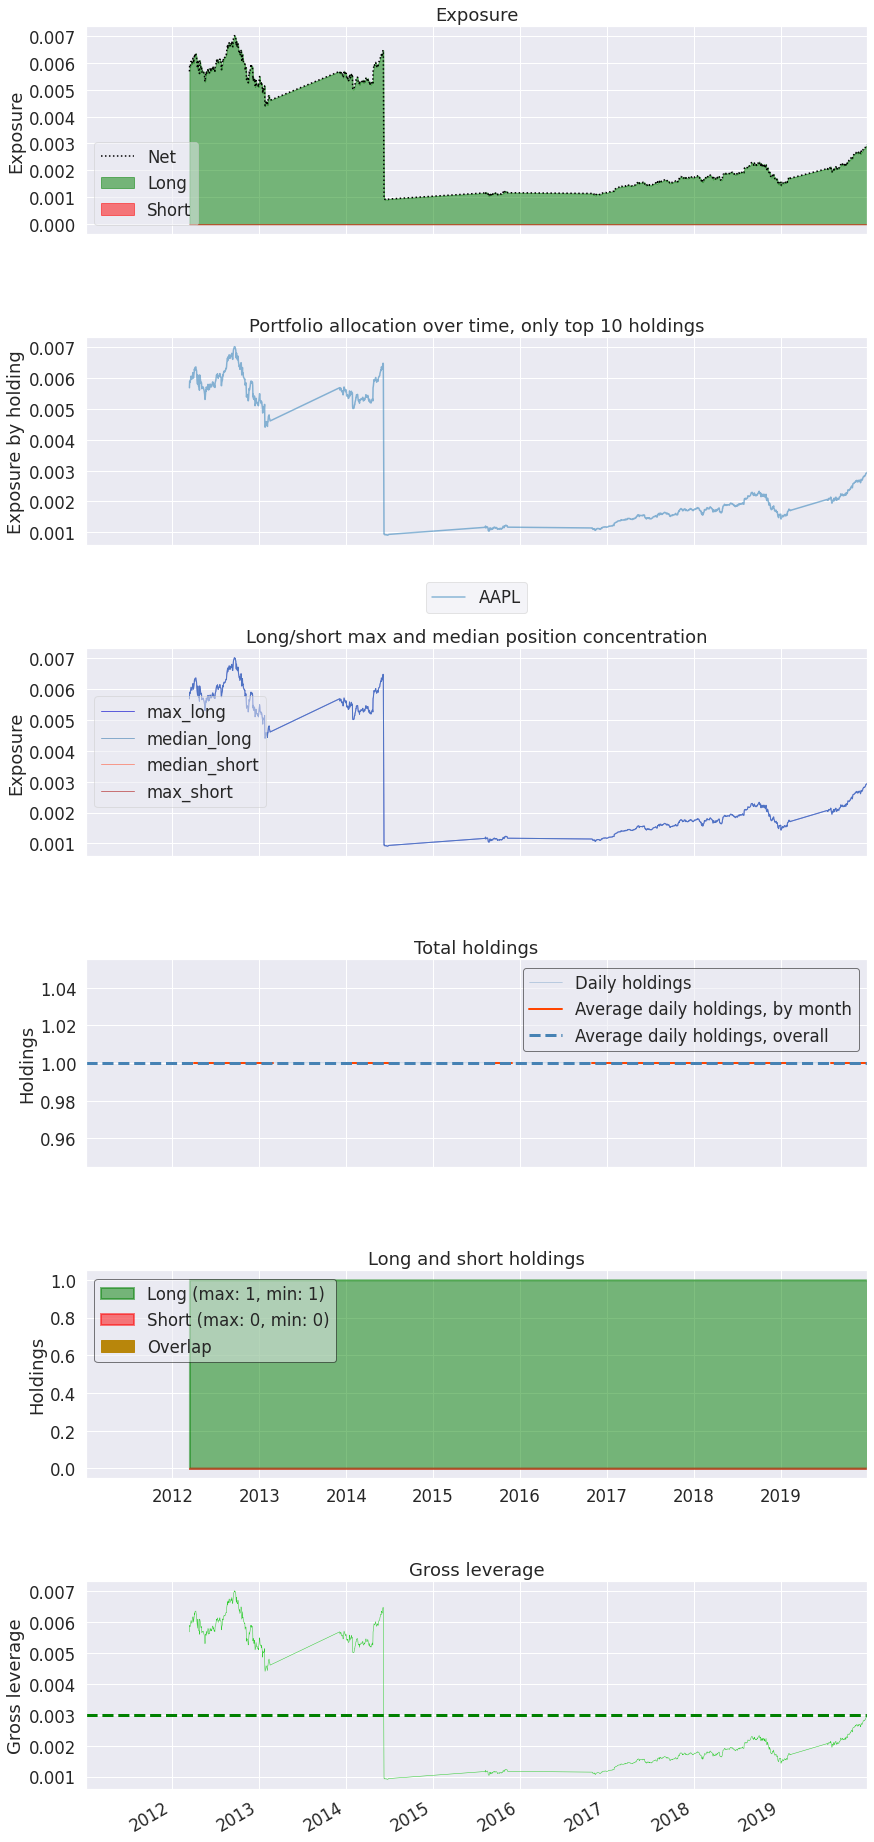

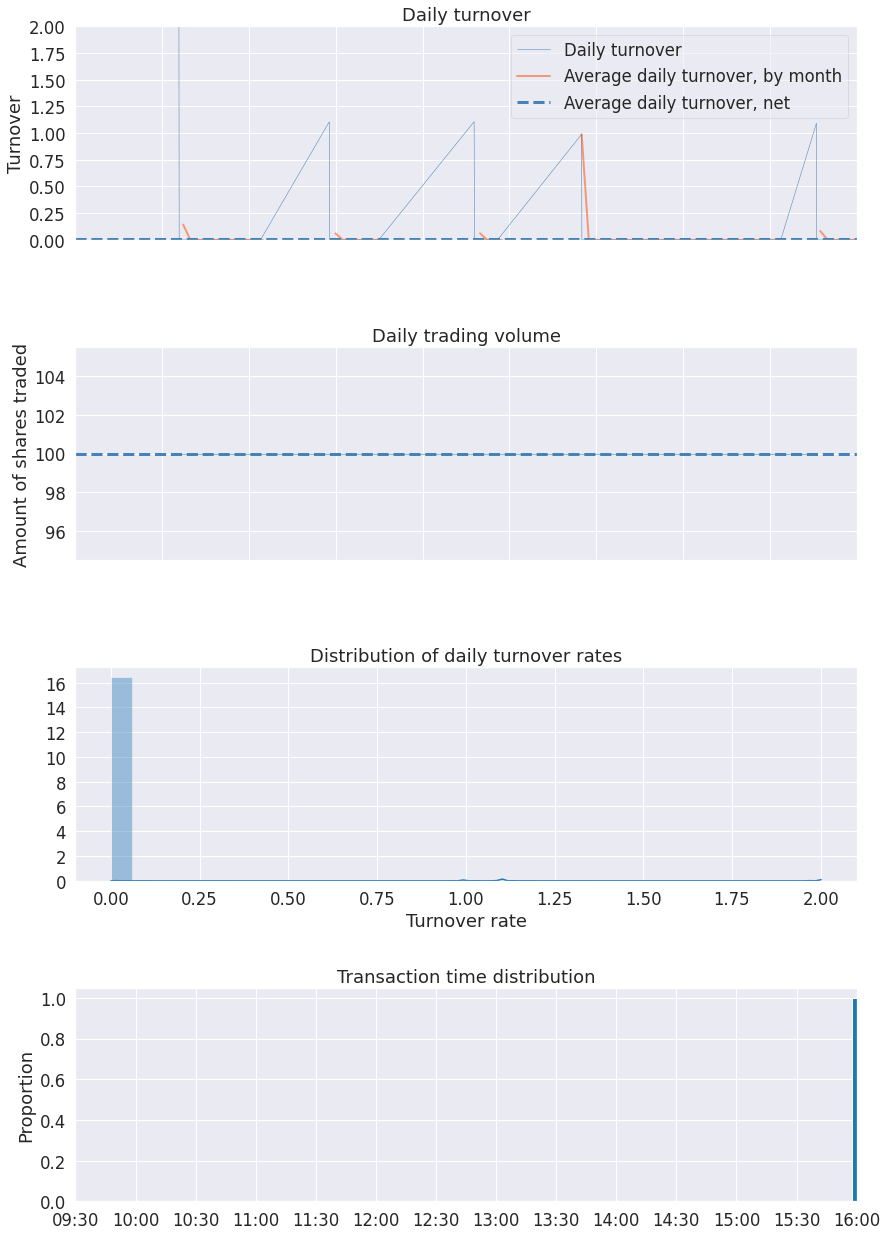

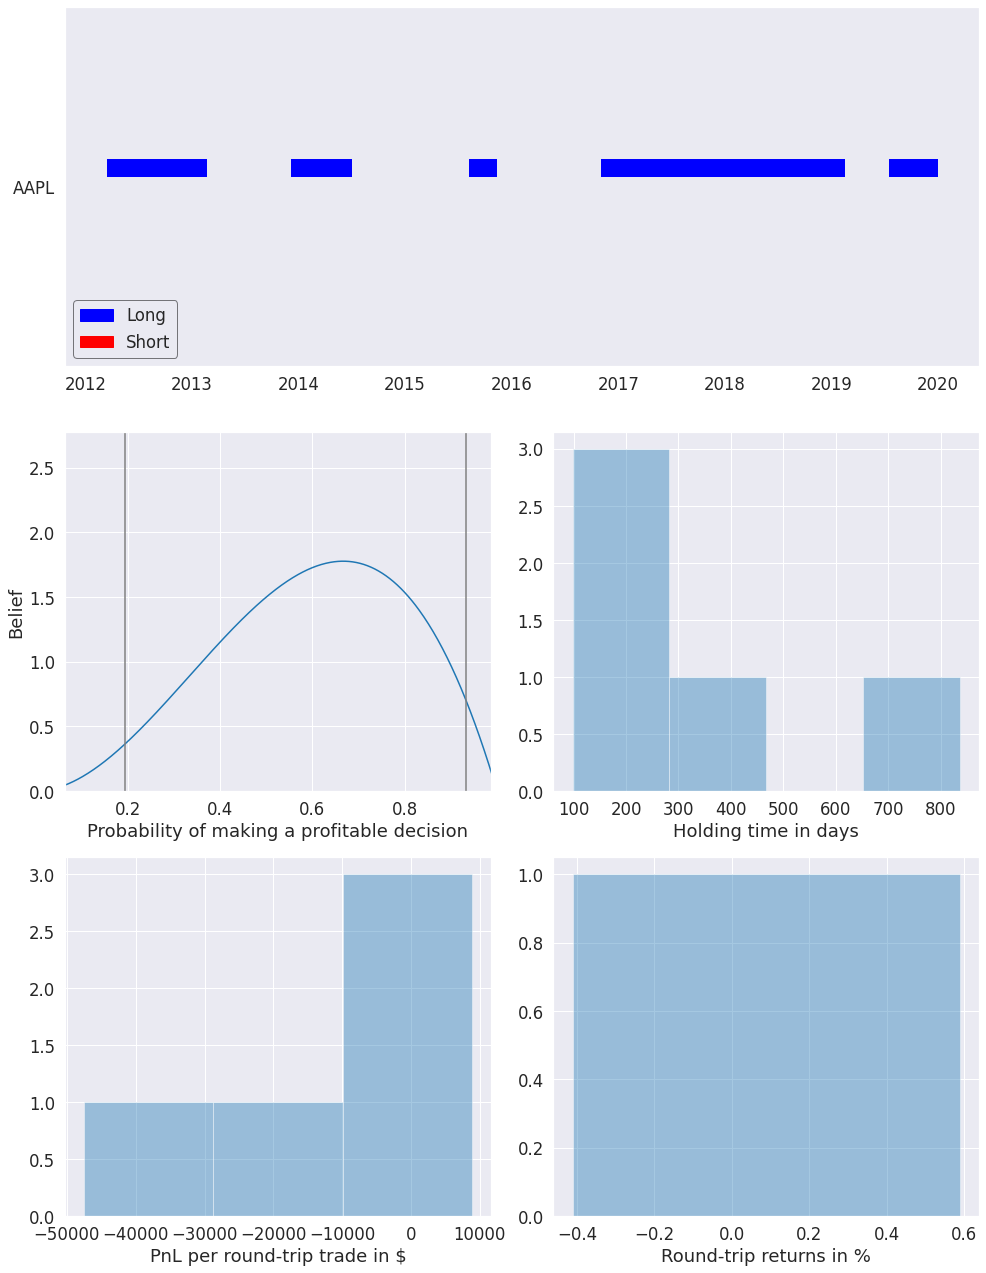

In [4]:
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, round_trips=True)